# Visualize Embeddings

## Import libraries

In [9]:
import os
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.preprocessing import StandardScaler

## Define Helper Functions

Data sampling

In [10]:
def sample_data(embeddings, sample_size=10000, seed=42):

    torch.manual_seed(seed)
    indices = torch.randperm(embeddings.shape[0])[:sample_size]
    return embeddings[indices].cpu().numpy(), indices

Apply t-SNE

In [18]:
def apply_tsne(data, n_components=2, perplexity=80, max_iter=1000, random_state=42, normalize=True):

    if normalize:
        print("Before normalizing sample:", data[0,-5:])
        data[:,-5:-1] = StandardScaler().fit_transform(data[:,-5:-1])
        print("After normalizing sample:", data[0,-5:])

    tsne = TSNE(n_components=n_components, perplexity=perplexity, max_iter=max_iter, random_state=random_state)
    return tsne.fit_transform(data)

Plot t-SNE

In [12]:
def plot_tsne(tsne_result, labels, title="t-SNE Visualization", save_path=None):
    
    colors = np.array(['royalblue', 'darkorange'])  # 0: human, 1: bot
    point_colors = colors[labels]

    plt.figure(figsize=(10, 8))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=point_colors, s=10, alpha=0.6)

    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='human', markerfacecolor='royalblue', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='bot', markerfacecolor='darkorange', markersize=10)
    ]
    plt.legend(handles=legend_elements, loc='upper right')
    plt.title(title)
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    
    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, dpi=300)
        print(f"Plot saved to: {save_path}")
        
    plt.show()

## Load Data

In [13]:
train_labels = torch.load("Data/Processed_Data/train_label_tensor.pth")

embedding_files = {
    #"GloVe Tweet": "Data/Processed_Data/train_tweet_emb_tensor.pth",
    #"RoBERTa Tweet": "Data/Processed_Data/train_tweet_roberta_emb_tensor.pth",
    #"GloVe+BiLSTM Tweet": "Data/Processed_Data/Glove_BiLSTM_tweet_embedding.pth",
    "GloVe+BiLSTM Tweet+Metadata": "Data/Processed_Data/Glove_BiLSTM_tweet_metadata_embedding.pth",
    #"RoBERTa+BiLSTM Tweet": "Data/Processed_Data/Roberta_LSTM_tweet_embedding.pth",
    "RoBERTa+BiLSTM Tweet+Metadata": "Data/Processed_Data/Roberta_LSTM_tweet_metadata_embedding.pth"
}

## Visualize Embeddings

Processing: GloVe+BiLSTM Tweet+Metadata
before normalizing [11681. 12490.   299.   347.     0.]
after normalizing [-0.17333959  0.03530888 -0.37523976 -0.11862958  0.        ]
Plot saved to: Images/tsne_GloVe+BiLSTM Tweet+Metadata.png


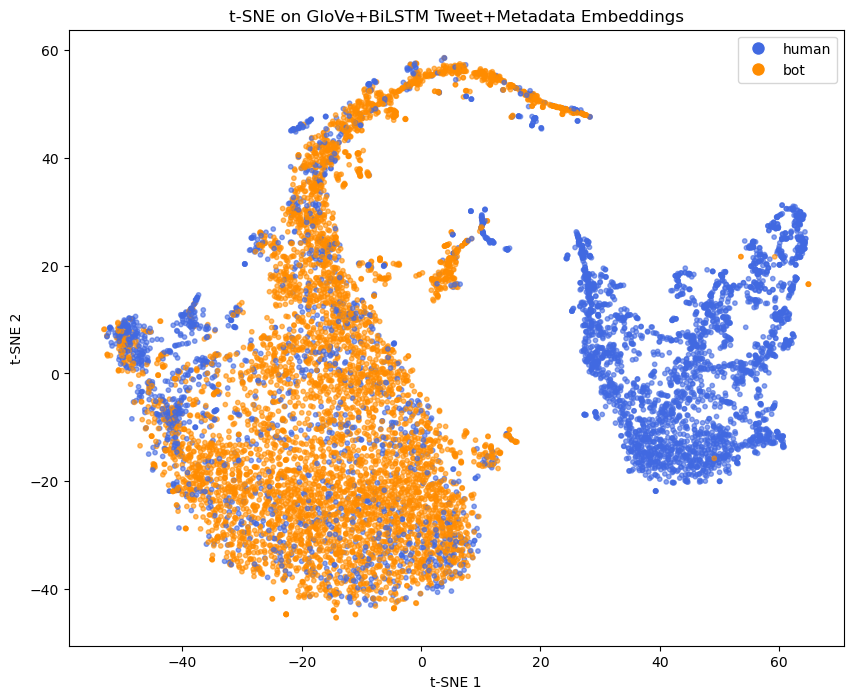

Processing: RoBERTa+BiLSTM Tweet+Metadata
before normalizing [11681. 12490.   299.   347.     0.]
after normalizing [-0.17333959  0.03530888 -0.37523976 -0.11862958  0.        ]
Plot saved to: Images/tsne_RoBERTa+BiLSTM Tweet+Metadata.png


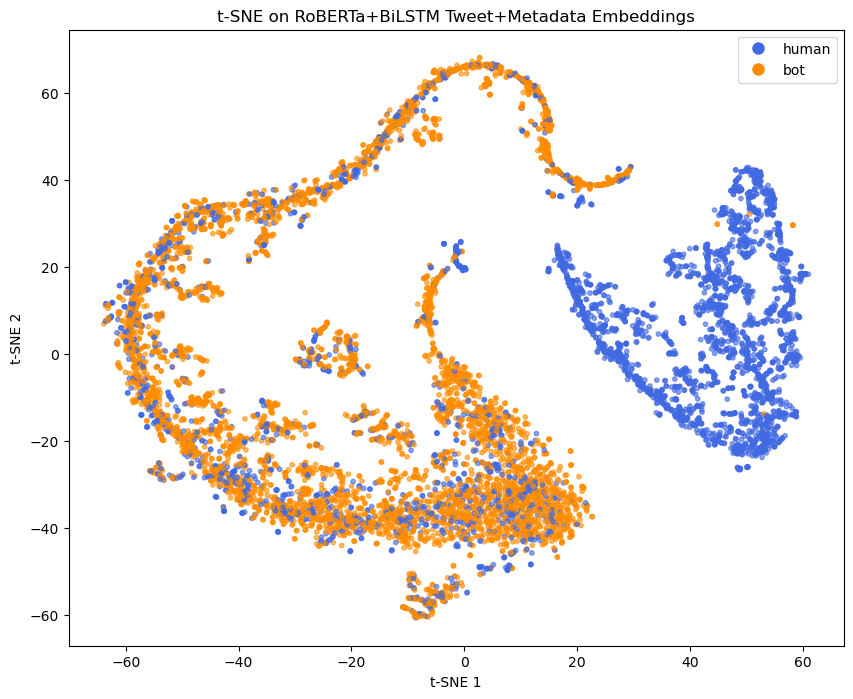

In [19]:
for name, path in embedding_files.items():
    print(f"Processing: {name}")
    embeddings = torch.load(path)
    
    # Optional dimension reduction for RoBERTa embeddings if needed
    if name == "RoBERTa":
        embeddings = embeddings[:, :200]
    
    sampled_data, indices = sample_data(embeddings)
    sampled_labels = train_labels[indices]
    
    plot_save_path = f"Images/tsne_{name}.png"
    
    tsne_result = apply_tsne(sampled_data)
    
    plot_tsne(tsne_result, sampled_labels, f"t-SNE on {name} Embeddings", save_path=plot_save_path)